# Libraries and initialisation

In [1]:
from pathlib import Path
import os
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
COLOR_MAP_NAME = 'cmc_batlows'

#import dask
#dask.config.set(scheduler='threads') 

# Import module
Importing module can take some time since it is linked to multiple other libraries (<30seconds)

In [2]:
import CL61_module as mCL61

# Open datasets

## i) Open from local folder with original files (ceilometer output)

Initialization...
- Getting filenames in data folder ... 
- Loading dataset from files with parameter: 
 	 load_to_memory=True, transfer_files_locally=False, parallel_computing=False


100%|██████████| 287/287 [00:29<00:00,  9.72it/s]


Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 
... module initialization completed !


c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

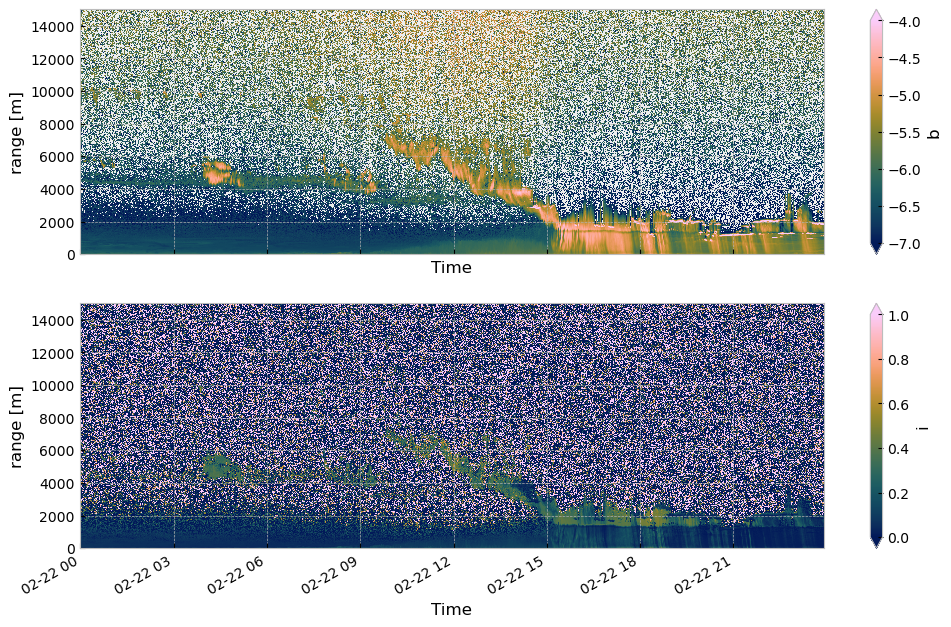

In [3]:
start_data = '2023-02-22 00:00:00'
end_data = '2023-02-23 00:00:00'
local_data_folder = "CL61_module/temp"

february22 = mCL61.CL61Processor(folder_path=local_data_folder, start_datetime=start_data, end_datetime=end_data, load_to_memory=True)

february22.plot.show_timeserie()

## ii) Or with a specific file

In [4]:
# Or from a specific netcdf file (quicker) 
februar04 = mCL61.CL61Processor(folder_path='Data_samples', specific_filename='cl61_20230204.nc')

Initialization...
- Loading dataset from files with parameter: 
 	 load_to_memory=False,transfer_files_locally=False, parallel_computing=False
load data from specific filne cl61_20230204.nc
Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 
... module initialization completed !


## iii) From data folder on server

In [ ]:
# here CHANGE the path 
server_data_folder = r"Y:\common\03_Experimental\Instruments\EERL_instruments\5. Remote sensing\CL61_Ceilometer\Data"

if not os.path.exists(server_data_folder):
    raise(ValueError("Not an existing path"))

start_data = '2023-02-23 00:00:00'
end_data = '2023-02-24 00:00:00'

februar23 = mCL61.CL61Processor(folder_path=server_data_folder, start_datetime=start_data, end_datetime=end_data,
                                 transfer_files_locally=True,
                                 load_to_memory=True,
                                 verbose=2)

# We can make some a Priori analysis of features

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Histogram of log attenuated backscatter values')

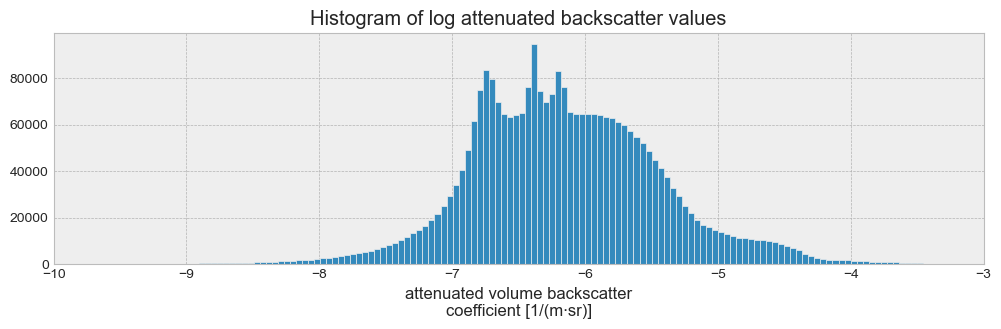

In [15]:
plt.figure(figsize=(12,3))
np.log10(februar04.dataset['beta_att']).plot.hist(bins=200, xlim=[-10, -3])
plt.title('Histogram of log10 raw attenuated backscatter values')

## (optional) save to compacted file for improved following usages

This process outputs the whole dataset as loaded now into a single .nc file at given path.

!! This process may take some time (expect 5-15min for 24 hour of data)

In [11]:
save_as_one = False # Change this
if save_as_one:
    februar22.dataset.to_netcdf(r"../Data/cl61_20230222.nc") # Or simply use this line separately

# Plot basic colormesh of raw data

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

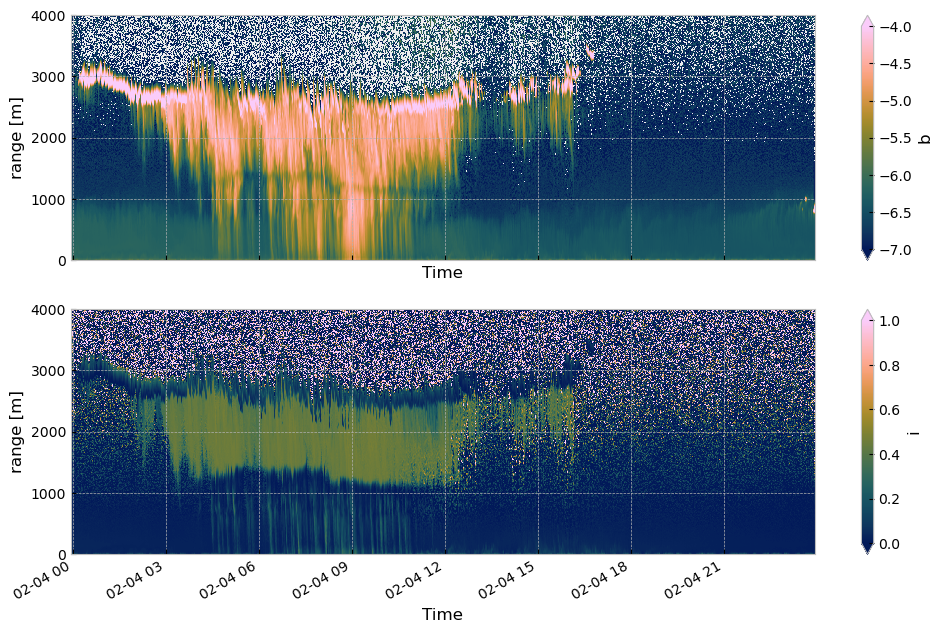

In [8]:
februar04.plot.show_timeserie(range_limits=[0,4000])

### Visualize cloud base heights as retrieved by instrument

c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


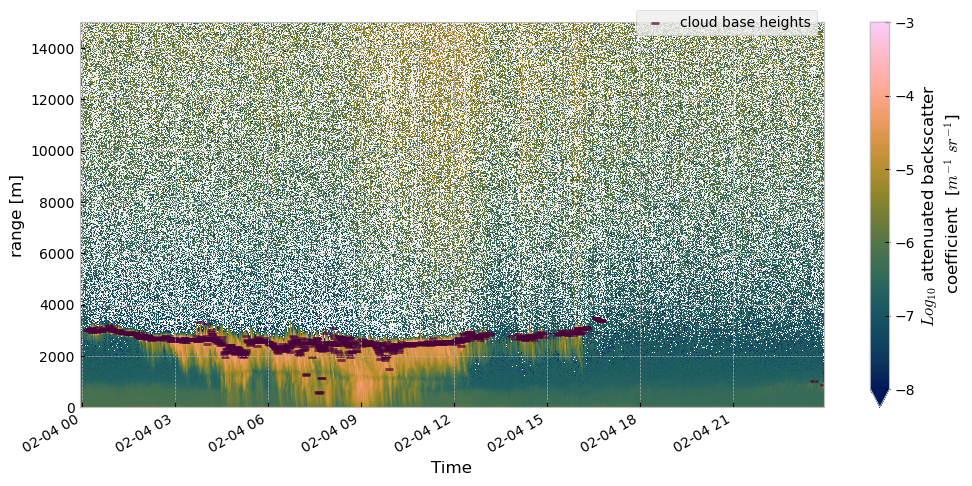

<Axes: xlabel='Time', ylabel='range [m]'>

In [9]:
februar04.plot.show_cloud_base_heights()

# 2) Filter out noisy part

In [12]:
# Run the method (function) that processes the noise removal (masking)
februar04.process_noise.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


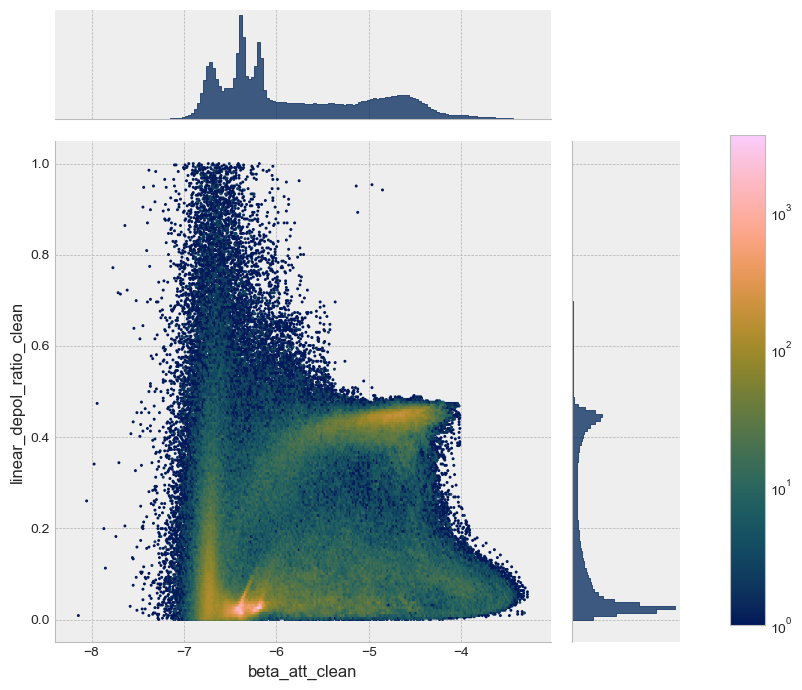

In [21]:
februar04.plot.histogram_2d(variable_1='beta_att_clean',
                            variable_2='linear_depol_ratio_clean')

## 2.2. Visualize results without noise

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

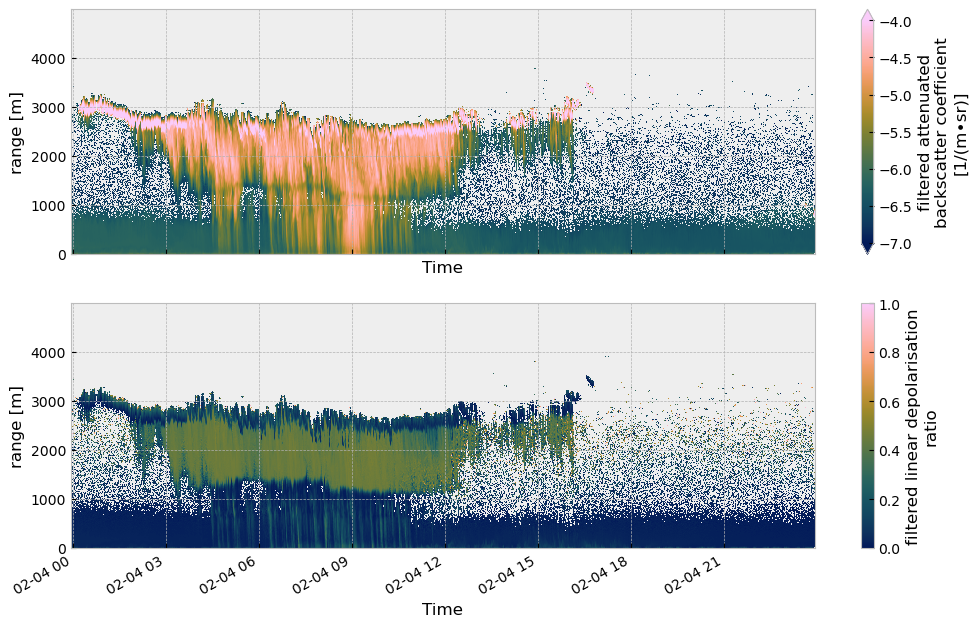

In [8]:
februar04.plot.show_timeserie(variable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,5000], save_fig=False)

## 2.3. Visualize as profiles

Text(0.5, 0, 'range [m]')

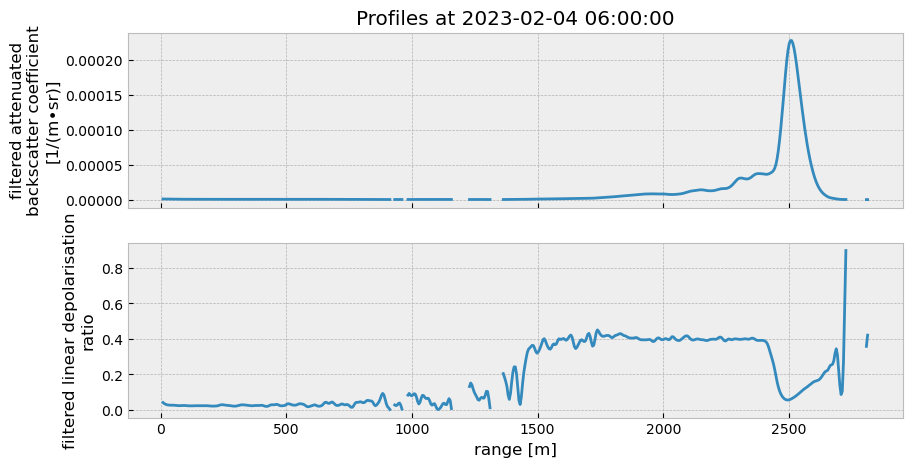

In [31]:
# Classic way (matplotlib + xarray plots)
time_of_interest = "2023-02-04 06:00:00"
fig, axs = plt.subplots(2,1, figsize=(10,5), sharex=True)
februar04.dataset['beta_att_clean'].sel(time=time_of_interest, method = 'nearest').plot(ax = axs[0])
februar04.dataset['linear_depol_ratio_clean'].sel(time="2023-02-04 06:00:00", method = 'nearest').plot(ax = axs[1])
axs[0].set_title(f'Profiles at {time_of_interest}')
axs[1].set_title('')
axs[0].set_xlabel('')
axs[1].set_xlabel('range [m]')

(<Axes: xlabel='beta att clean', ylabel='range [m]'>,
 <Axes: title={'center': 'CL61 profiles - 2023-02-04 06:00:00'}, xlabel='linear depol ratio clean'>)

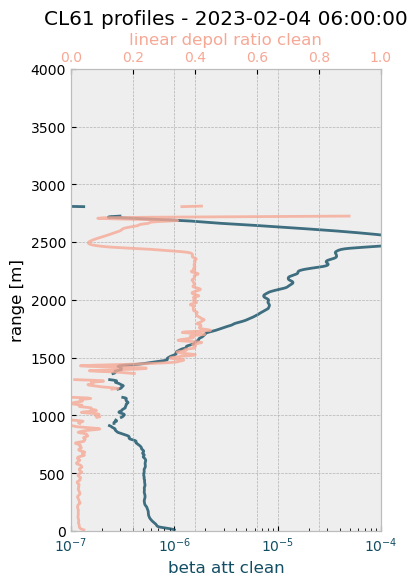

In [14]:
# Visualize the profile at a precise time (implemented)
februar04.plot.vertical_profile(time_period="2023-02-04 06:00:00",
                             var_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                             xlabel1='beta att clean',
                             xlabel2= 'linear depol ratio clean',
                             range_limits=[0, 4000],
                             x_scales=['log', 'lin'])

(<Axes: xlabel='beta att clean', ylabel='range [m]'>,
 <Axes: title={'center': "CL61 profiles - ['2023-02-04 06:00:00', '2023-02-04 09:00:00']"}, xlabel='linear depol ratio clean'>)

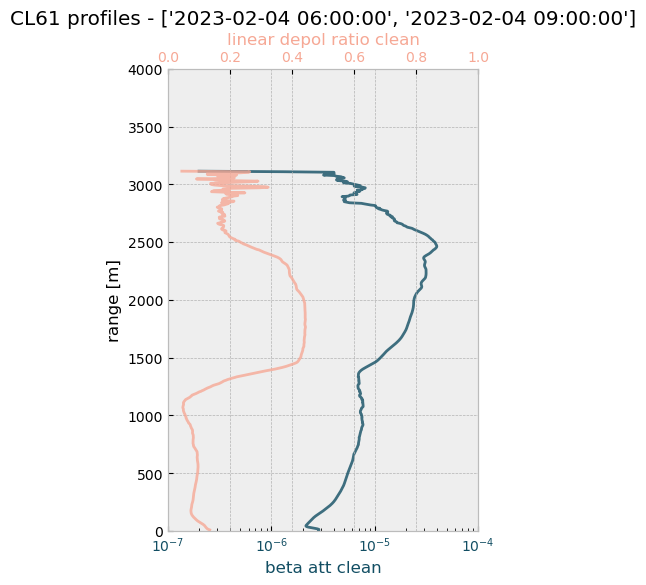

In [13]:
# Average profile in a time slice
februar04.plot.vertical_profile(time_period=["2023-02-04 06:00:00", "2023-02-04 09:00:00"],
                             var_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                             xlabel1='beta att clean',
                             xlabel2= 'linear depol ratio clean',
                             range_limits=[0, 4000],
                             x_scales=['log', 'lin'])

Saved element to ..\Outputs\2023-02-03T23_comp_profiles


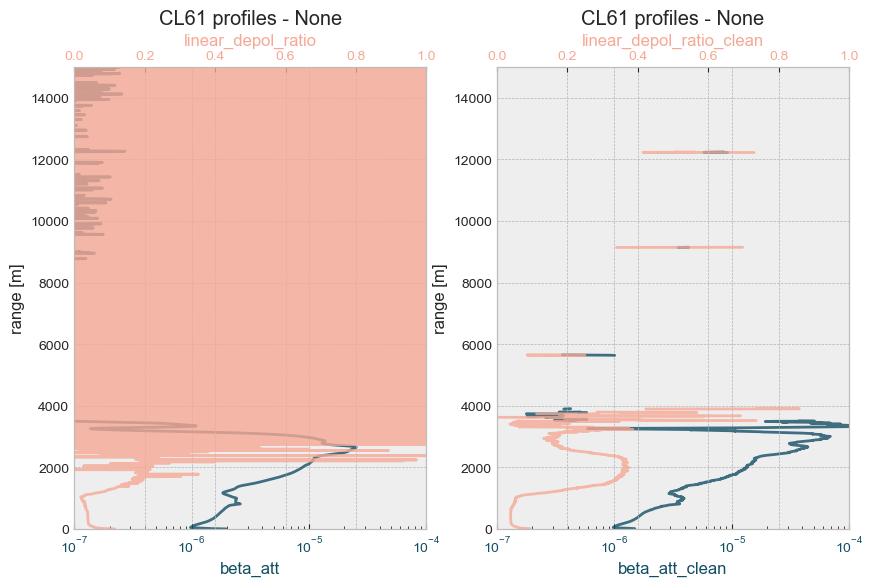

In [24]:
# We can also compare different profiles (f.ex with and without noise removed)
februar04.plot.compare_profiles()

In [9]:
import matplotlib.pyplot as plt

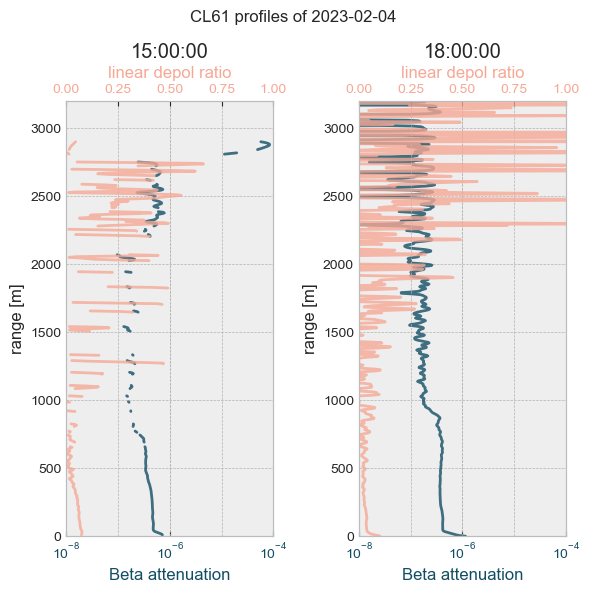

In [32]:
fig, ax = plt.subplots(1,2, figsize = (6,6))
_, ax[0] = februar04.plot.vertical_profile(
    var_names= ['beta_att_clean', 'linear_depol_ratio_clean'],
    time_period="2023-02-04 15:00:00",
    range_limits=[0,3200],
    var_xlims=[[1e-8, 1e-4], [0,1]],
    ax=ax[0], fig=fig)
ax[0].set_title("15:00:00")

_, ax[1] = februar04.plot.vertical_profile(time_period="2023-02-04 18:00:00", range_limits=[0,3200], var_xlims=[[1e-8, 1e-4], [0,1]], ax=ax[1], fig = fig)
ax[1].set_title("18:00:00")
plt.suptitle('CL61 profiles of 2023-02-04 ')
plt.tight_layout()

# K-mean clustering

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


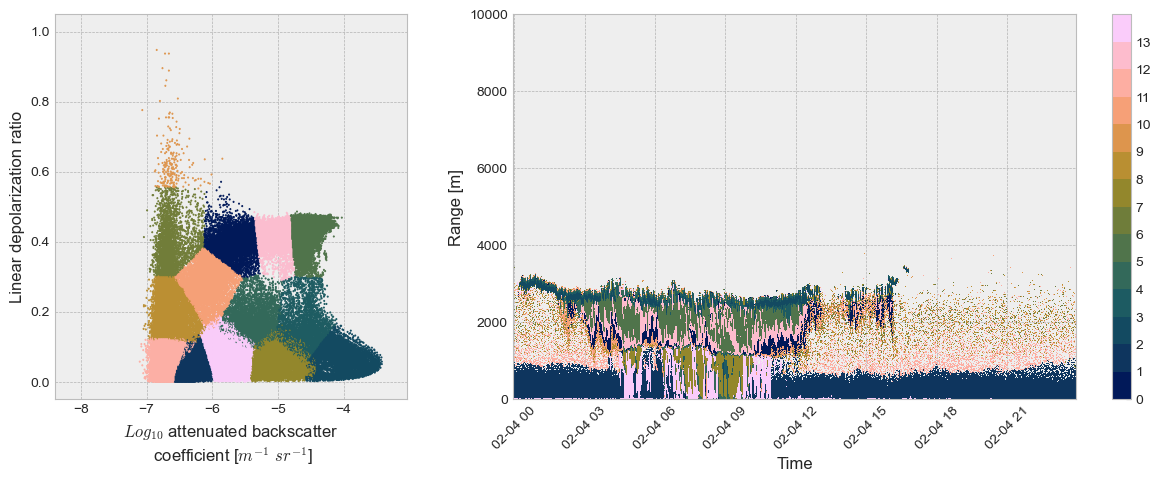

saving results under followingkmean_clusters


(<Axes: xlabel='Time', ylabel='Range [m]'>,
 array([<Axes: xlabel='$Log_{10}$ attenuated backscatter \n coefficient [$m^{-1}~sr^{-1}$]', ylabel='Linear depolarization ratio'>,
        <Figure size 1500x500 with 3 Axes>], dtype=object))

In [33]:
februar04.classification.Kmeans_clustering(
    variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
    weights=[1, 1, 0.25],
    cluster_N = 14,
    plot_result = True,
    save_fig=False)

# Classify

## i) Cluster wise

In [34]:
februar04.classification.classify_clusters()

Classifying cluster from kmean_clusters
 Successful cluster classification stored in dataset under classified_clusters


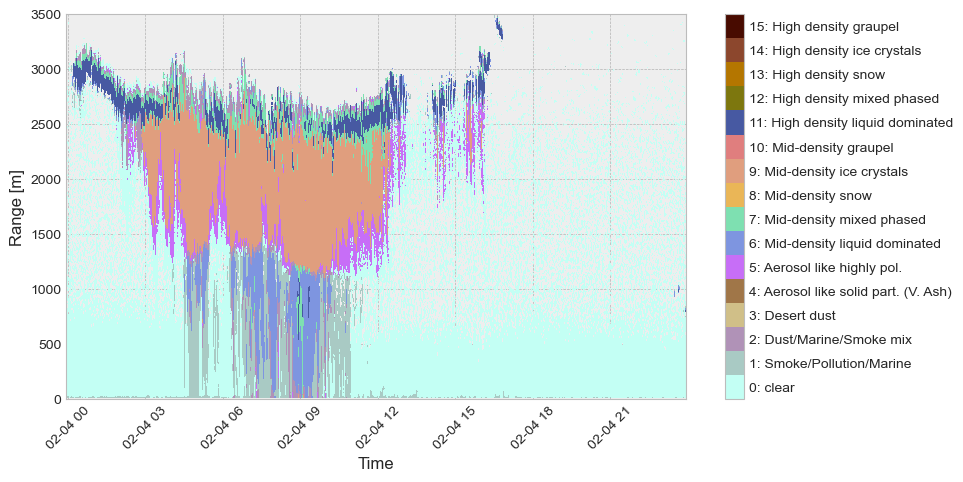

(<Figure size 1000x500 with 2 Axes>, <Axes: xlabel='Time', ylabel='Range [m]'>)

In [35]:
februar04.plot.show_classified_timeserie(classified_variable='classified_clusters',
                                         ylims=[0,3500])

## ii) element-wise

In [36]:
februar04.classification.classify_elementwise()

Successful pixel-wise classification stored in dataset under classified_elements


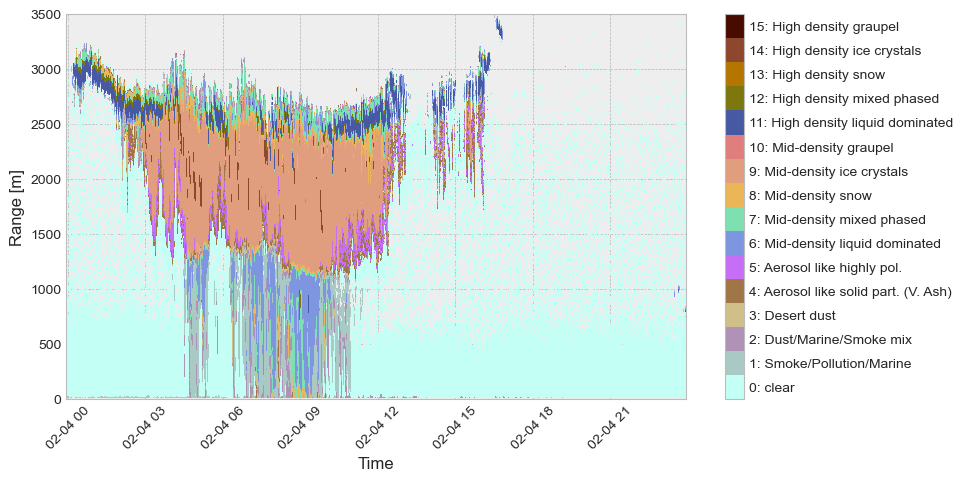

(<Figure size 1000x500 with 2 Axes>, <Axes: xlabel='Time', ylabel='Range [m]'>)

In [37]:
februar04.plot.show_classified_timeserie(classified_variable='classified_elements', ylims=[0,3500])

# Full automated pipeline for february 22

Step 1: applying noise removal process
The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask
step 2: cluster data with kmean method
(4701060, 3)
Scaler means: [-5.83793593e+00  1.74732095e-01  1.80478805e+03]  
 and scales: [7.02716557e-01 1.70202953e-01 1.72734465e+03]
saving results under followingkmean_clusters
Classifying cluster from kmean_clusters
 Successful cluster classification stored in dataset under classified_clusters
Step 3: Classify the elements and clusters based on the classification given in config file
Successful pixel-wise classification stored in dataset under classified_elements
Step 4: Ending...
... Automated process finished successfully !


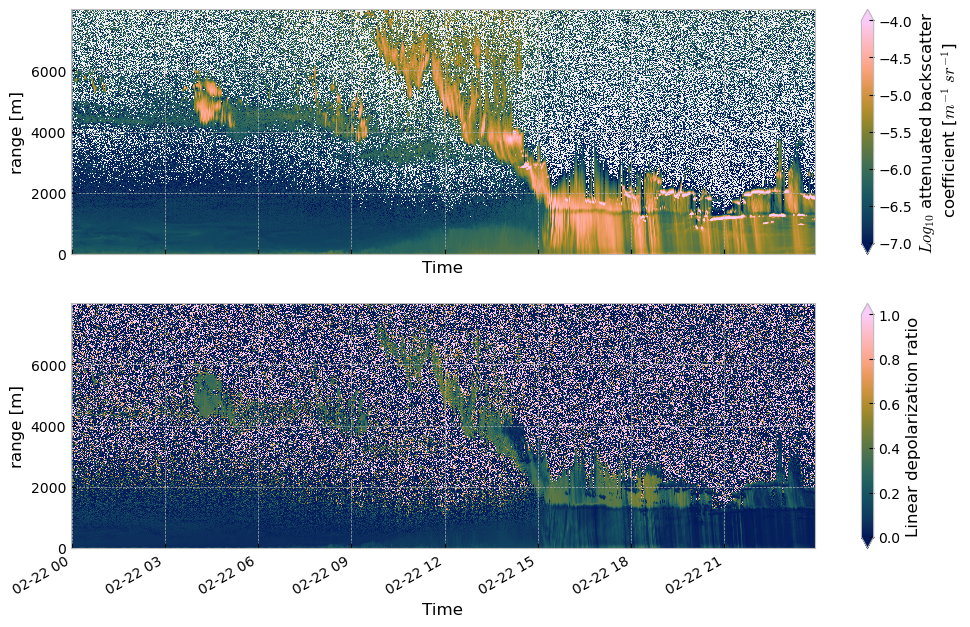

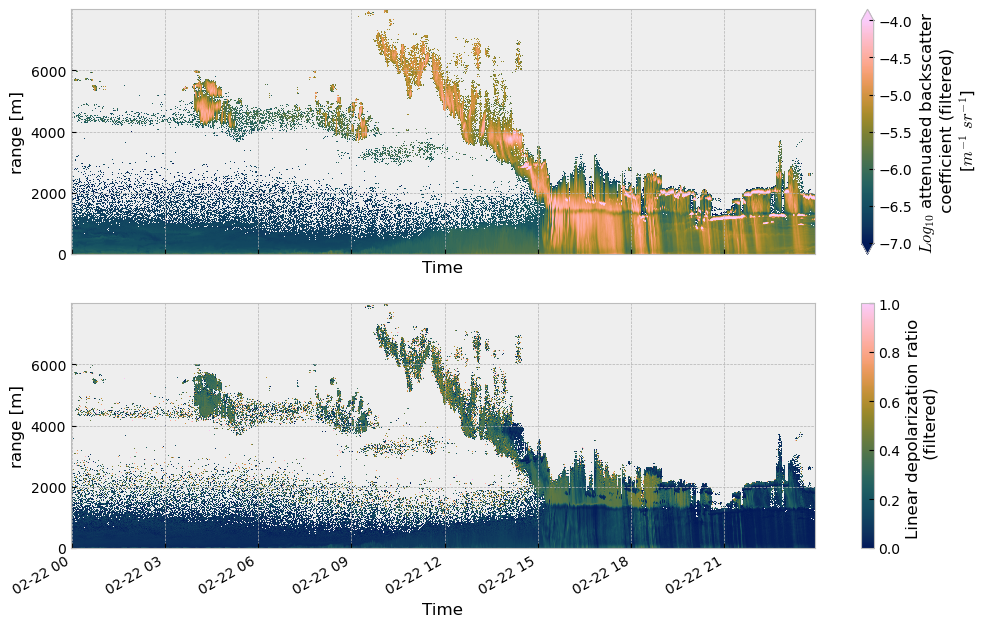

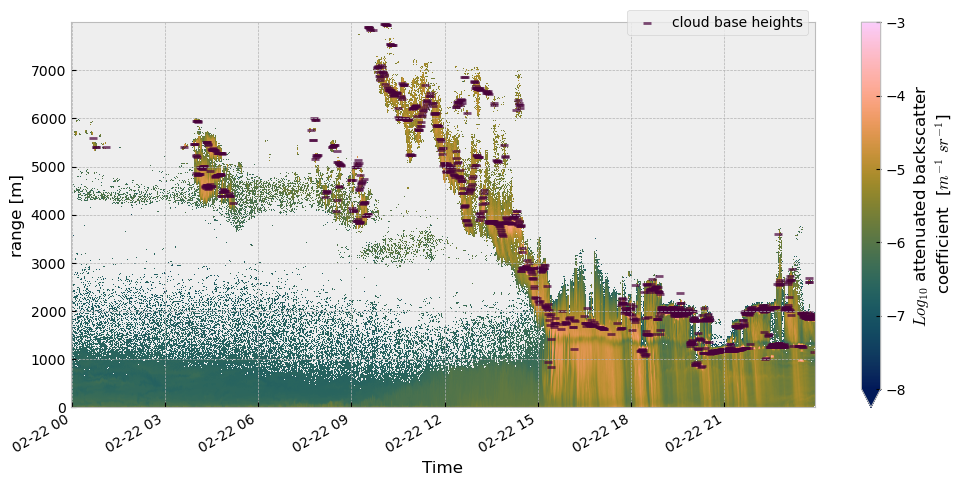

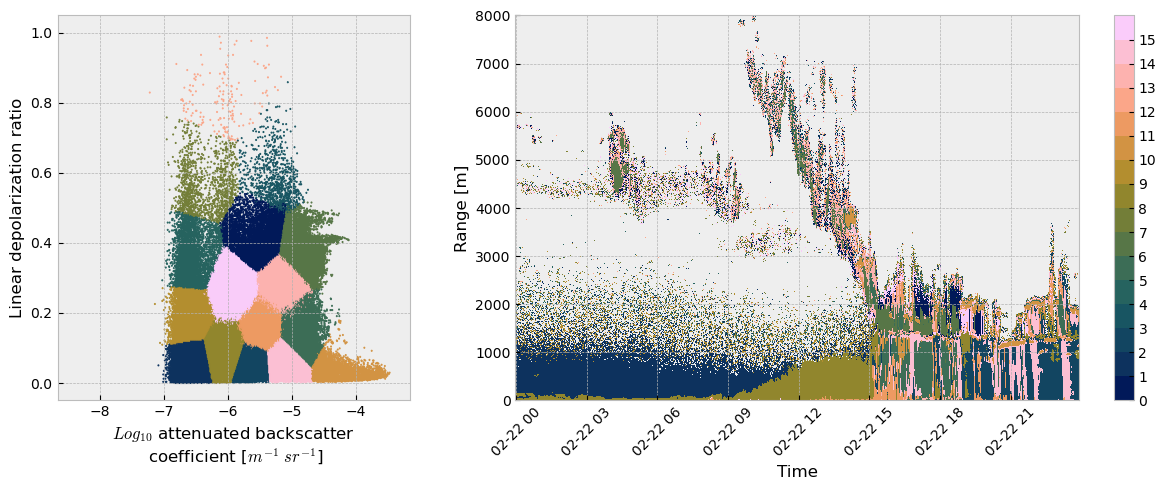

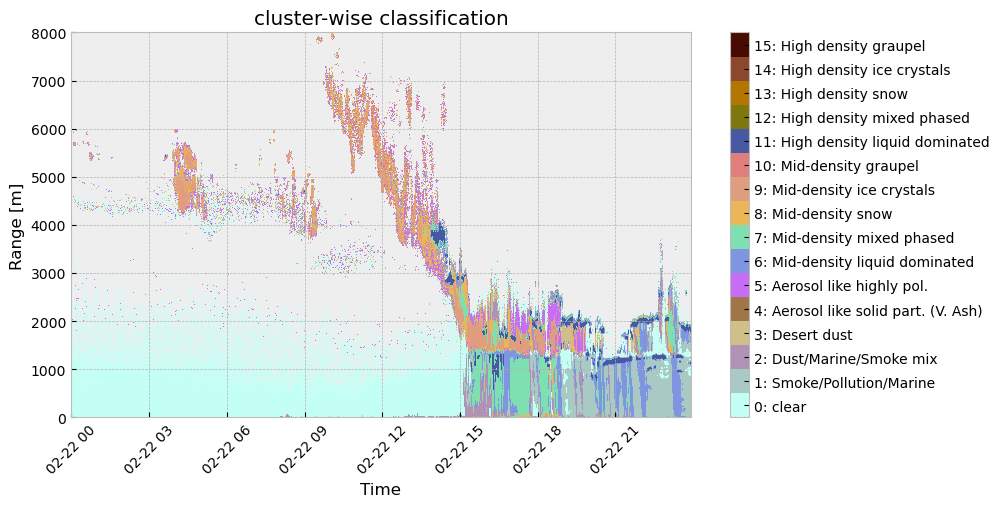

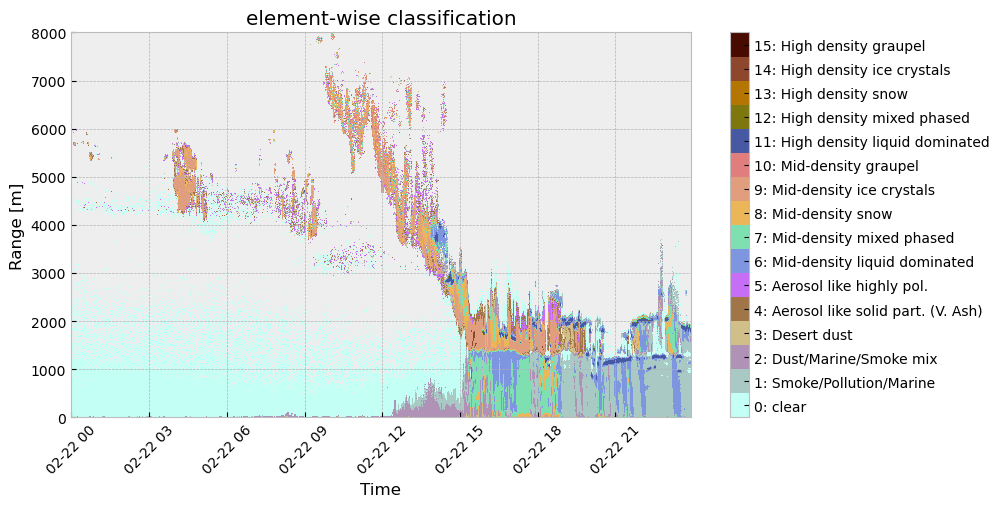

In [4]:
february22.auto_process(range_limits=[0,8000])
# Takes : 